# Problem statement: 

Dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing, use bank_full.csv


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [3]:
df = pd.read_csv("/data/bank-full.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


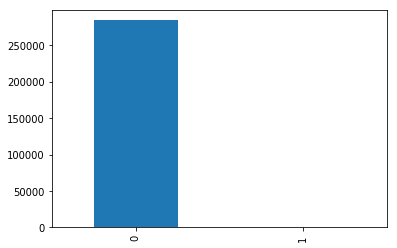

In [9]:
df.Class.value_counts().plot.bar()

In [10]:
df.Class.value_counts() / len(df.Class)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [12]:
target = "Class"
y = df.Class
X = df.copy()
del X[target]
del X["Time"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [13]:
y_test_pred = pipe.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.9991456292499094

In [14]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x1a0eee8320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0eee8ef0>)

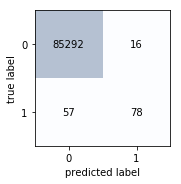

In [15]:
 plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [17]:
recall = 78/(78+57)
recall

0.5777777777777777

In [23]:
precision = metrics.precision_score(y_test, y_test_pred)
precision

0.0015800007022225343

In [18]:
metrics.recall_score(y_test, y_test_pred)

0.5777777777777777

recall: 1.0 precision:  0.0015800007022225343


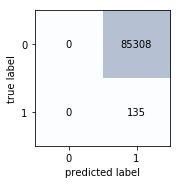

In [24]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.0, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("recall:", metrics.recall_score(y_test, y_test_pred), 
"precision: ", metrics.precision_score(y_test, y_test_pred))

recall: 0.6296296296296297 precision:  0.794392523364486


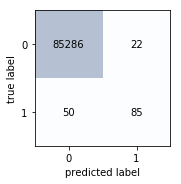

In [25]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.3, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("recall:", metrics.recall_score(y_test, y_test_pred), 
"precision: ", metrics.precision_score(y_test, y_test_pred))

In [26]:
metrics.f1_score(y_test, y_test_pred)

0.7024793388429753

In [27]:
p, r = metrics.recall_score(y_test, y_test_pred), metrics.precision_score(y_test, y_test_pred)
2 * p * r/(p+r) 

0.7024793388429753

Text(0,0.5,'TPR')

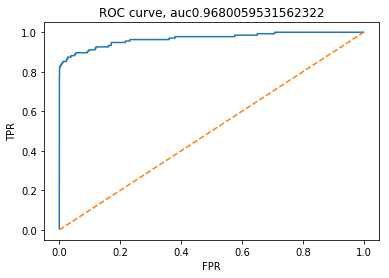

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
auc = metrics.auc(fpr, tpr)
plt.title("ROC curve, auc: " + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")

In [38]:
param_grid = {
    "est__C": 10 ** np.linspace(-2, 2, 5) 
}

grid = model_selection.GridSearchCV(pipe, param_grid, cv = 5,                           
        verbose = True, scoring = "f1")
grid.fit(X_train, y_train)
auc = metrics.f1_score(y_test, 
                grid.best_estimator_.predict(X_test))
print("F1 score for testing dataset", auc)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   44.0s finished


F1 score for testing dataset 0.6812227074235807
